In [3]:
%%capture
!pip install --progress-bar off --quiet poetry
!pip install --progress-bar off git+https://github.com/oughtinc/ergo.git@aced2c493071e3fd7167053b8b8747e3ceb88983

PointDensity distributions are represented by 200 evenly spaced points and corresponding probability densities. Below I define a utility function for plotting PointDensity distributions.

In [14]:
import seaborn

def plot_dist(dist, denorm_xs_only=False, scatter=False):
    xs = dist.scale.denormalize_points(dist.normed_xs)
    densities = dist.normed_densities
    if not denorm_xs_only:
        densities = dist.scale.denormalize_densities(xs, dist.normed_densities)
    if scatter:
    else:
        seaborn.lineplot(xs, densities)


Before we create PoitnDensity distributions, we need to define the scale the distribution operates on. We'll start with a scale with a minimum of 0 and maximum of 100.

In [6]:
from ergo.scale import Scale

scale = Scale(0, 100)

There are 2 ways to create PointDensity distributions: `from_pairs` and `from_conditions`. It's best practice not to directly initialize them. `from_pairs` takes as input a list of point-density pairs. Let's create a uniform distribution first.

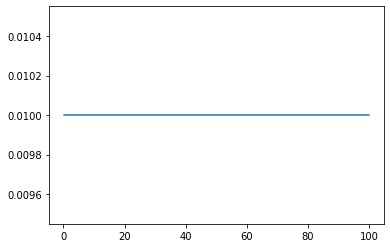

In [18]:
from ergo.distributions import PointDensity

# Creating a uniform distribution using from_pairs. 
# Even though we don't pass in 200 points, from_pairs interpolates to create the 200 we need.
pairs = [
    {'x': 0, 'density': 1},
    {'x': 100, 'density': 1}
]

dist = PointDensity.from_pairs(pairs, scale)
plot_dist(dist)

Note that we enforce the AUC to be 1, so if you pass in pairs with densities that don't create an AUC of 1 they will be adjusted.

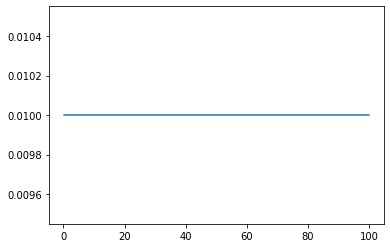

In [19]:
# Creating a uniform distribution using from_pairs, with densities that are too small. 
pairs = [
    {'x': 0, 'density': .01},
    {'x': 100, 'density': .01}
]

dist = PointDensity.from_pairs(pairs, scale)
plot_dist(dist)

`from_conditions` takes as input a list of conditions.

Tracing MaxEntropyCondition loss for PointDensity distribution:
- Fixed: {'xs': Traced<ShapedArray(float32[200]):JaxprTrace(level=-1/1)>}
- Optim: Traced<ShapedArray(float32[200]):JaxprTrace(level=-1/1)>
- Cond: (Traced<ShapedArray(float32[], weak_type=True):JaxprTrace(level=-1/1)>,)
- Loss: Traced<ShapedArray(float32[]):JaxprTrace(level=-1/1)>


Tracing MaxEntropyCondition loss for PointDensity distribution:
- Fixed: {'xs': Traced<ShapedArray(float32[200]):JaxprTrace(level=0/2)>}
- Optim: Traced<ShapedArray(float32[200])>with<JVPTrace(level=1/2)>
  with primal = Traced<ShapedArray(float32[200]):JaxprTrace(level=0/2)>
       tangent = Traced<ShapedArray(float32[200]):JaxprTrace(level=0/2)>
- Cond: (Traced<ShapedArray(float32[], weak_type=True):JaxprTrace(level=0/2)>,)
- Loss: Traced<ShapedArray(float32[])>with<JVPTrace(level=1/2)>
  with primal = Traced<ShapedArray(float32[]):JaxprTrace(level=-1/2)>
       tangent = Traced<ShapedArray(float32[]):JaxprTrace(level=0/2)>




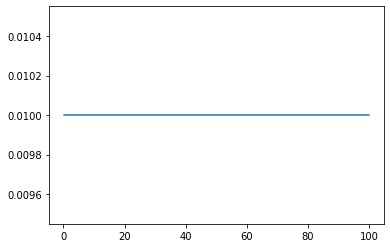

In [17]:
# Creating a uniform distribution using from_conditions
from ergo.conditions import MaxEntropyCondition

max_entropy_condition = MaxEntropyCondition(weight=.01)
dist = PointDensity.from_conditions([max_entropy_condition], scale=scale)

plot_dist(dist)